On commence par l'import des librairies dont on aura besoin

In [427]:
#Importing librairies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from urllib import request
from sklearn.impute import SimpleImputer
import os
import zipfile


In [428]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("La version utilisée de la laibririe:  {}=={}".format(*r))


La version utilisée de la laibririe:  seaborn==0.11.1
La version utilisée de la laibririe:  scikit-learn==0.24.2
La version utilisée de la laibririe:  pandas==1.2.4
La version utilisée de la laibririe:  numpy==1.18.5
La version utilisée de la laibririe:  matplotlib==3.3.3


In [429]:
#Importing files from a zip repository and 
path=r"\Users\Utilisateur\OneDrive\Bureau\Projet+Python_Dataset_Edstats_csv.zip"#### le chemin vers le répertoire zip des données
with zipfile.ZipFile(path, "r") as zfile:
    dfs = {name[:-4]: pd.read_csv(zfile.open(name))
       for name in zfile.namelist()
       }
    zfile.close()


In [430]:
# On va télécharger chaque fichier dans un dataframe Pandas
EdStatsCountry=dfs['EdStatsCountry']
EdStatsData=dfs['EdStatsData']
EdStatsCountry_Series=dfs['EdStatsCountry-Series']
EdStatsFootNote=dfs['EdStatsFootNote']
EdStatsSeries=dfs['EdStatsSeries']

In [431]:
EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [432]:
EdStatsData.head( )

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [433]:
EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [434]:
EdStatsCountry_Series.head()


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [435]:
EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [436]:
# This function prints the shape and the number of columns of each type 
def description(data):
    print('Le dataset est de taille:{}'.format( data.shape))
    print('Le dataset comporte {} lignes et {} colonnes'.format( data.shape[0], data.shape[1]))
    print('Le dataset contient {} colonnes de type object'.format( sum(data.dtypes==object)))
    print('Le dataset contient {} colonnes numérique'.format( sum(data.dtypes=='int64' )+sum( data.dtypes=='float64')))
    print('Le dataset contient {} colonnes de type booléans'.format( sum(data.dtypes==bool)))
    print('Le dataset contient {} colonnes de type date'.format( sum(data.dtypes=='datetime64')))
    print('Le dataset contient {} colonnes de type timedelta'.format( sum(data.dtypes=='timedelta[ns]')))
    print('Le dataset contient {} colonnes de type catégorie'.format( sum(data.dtypes=='category')))



In [437]:
print("Voici les détails sur le dataset: EdStatsData ")
description(EdStatsData)
print("\n" "Voici les détails sur le dataset: EdStatsCountry ")
description(EdStatsCountry)
print("\n" "Voici les détails sur le dataset: EdStatsCountry_Series ")
description(EdStatsCountry_Series)
print("\n" "Voici les détails sur le dataset: EdStatsFootNote ")
description(EdStatsFootNote)
print("\n" "Voici les détails sur le dataset: EdStatsSeries ")
description(EdStatsSeries)

Voici les détails sur le dataset: EdStatsData 
Le dataset est de taille:(886930, 70)
Le dataset comporte 886930 lignes et 70 colonnes
Le dataset contient 4 colonnes de type object
Le dataset contient 66 colonnes numérique
Le dataset contient 0 colonnes de type booléans
Le dataset contient 0 colonnes de type date
Le dataset contient 0 colonnes de type timedelta
Le dataset contient 0 colonnes de type catégorie

Voici les détails sur le dataset: EdStatsCountry 
Le dataset est de taille:(241, 32)
Le dataset comporte 241 lignes et 32 colonnes
Le dataset contient 28 colonnes de type object
Le dataset contient 4 colonnes numérique
Le dataset contient 0 colonnes de type booléans
Le dataset contient 0 colonnes de type date
Le dataset contient 0 colonnes de type timedelta
Le dataset contient 0 colonnes de type catégorie

Voici les détails sur le dataset: EdStatsCountry_Series 
Le dataset est de taille:(613, 4)
Le dataset comporte 613 lignes et 4 colonnes
Le dataset contient 3 colonnes de type ob

In [438]:

EdStatsData.describe( include='all')


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,886930,886930,886930,886930,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dominican Republic,PRK,Wittgenstein Projection: Percentage of the pop...,BAR.SCHL.4549,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,NaN,NaN,NaN,NaN,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,NaN,NaN,NaN,NaN,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,NaN,NaN,NaN,NaN,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,NaN,NaN,NaN,NaN,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN


In [439]:
EdStatsCountry.describe( include='all')

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
count,241,241,241,241,238,215,145,214,214,240,...,181,213,141,160,111,142,107.000000,185.000000,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,...,2,27,60,75,2,35,NaN,NaN,20,NaN
top,CIV,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Republic of Kazakhstan,PH,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,PH,...,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,...,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007.500000,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN


In [440]:

EdStatsCountry_Series.describe( include='all')


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
count,613,613,613,0.0
unique,211,21,97,NaN
top,GEO,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
freq,18,211,154,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


In [441]:
EdStatsFootNote.describe( include='all')


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
count,643638,643638,643638,643638,0.0
unique,239,1558,56,9102,NaN
top,LIC,SH.DYN.MORT,YR2004,Country Data,NaN
freq,7320,9226,27128,191188,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


In [442]:
EdStatsSeries.describe( include='all')

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,...,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,...,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,SP.POP.1216.MA.UN,Learning Outcomes,EGRA: Reading Comprehension - Share of student...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,...,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [443]:
# This function checks if our dataframe passed as an argument contains any duplicated lignes
def Check_duplicate(data):
    if data.duplicated().any():
        return "Le dataset contient des données dupliquées"
    return "Le dataset ne contient pas des données dupliquées"
   

In [444]:
Check_duplicate(EdStatsData)

'Le dataset ne contient pas des données dupliquées'

In [445]:
Check_duplicate(EdStatsCountry)

'Le dataset ne contient pas des données dupliquées'

In [446]:
Check_duplicate(EdStatsCountry_Series)

'Le dataset ne contient pas des données dupliquées'

In [447]:
Check_duplicate(EdStatsFootNote)

'Le dataset ne contient pas des données dupliquées'

In [448]:
Check_duplicate(EdStatsSeries)

'Le dataset ne contient pas des données dupliquées'

In [449]:
# This function will compute the mean of missing values in each column and plot the results
def plotting(data, name, i):
    BIGGER_SIZE=15
    plt.rc('font', size=BIGGER_SIZE)# taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)# taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)# taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)# taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)# taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)# taille du titre
    plt.subplot(2,3,i)
    plt.plot(data.isnull().mean().values)
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlim([0,data.shape[1]])
    plt.ylim([0,1])
    plt.xlabel("Numéro de la colonne")
    plt.ylabel("Moyenne")
    
    plt.title("moyenne des données manquante:  "+ name)
    



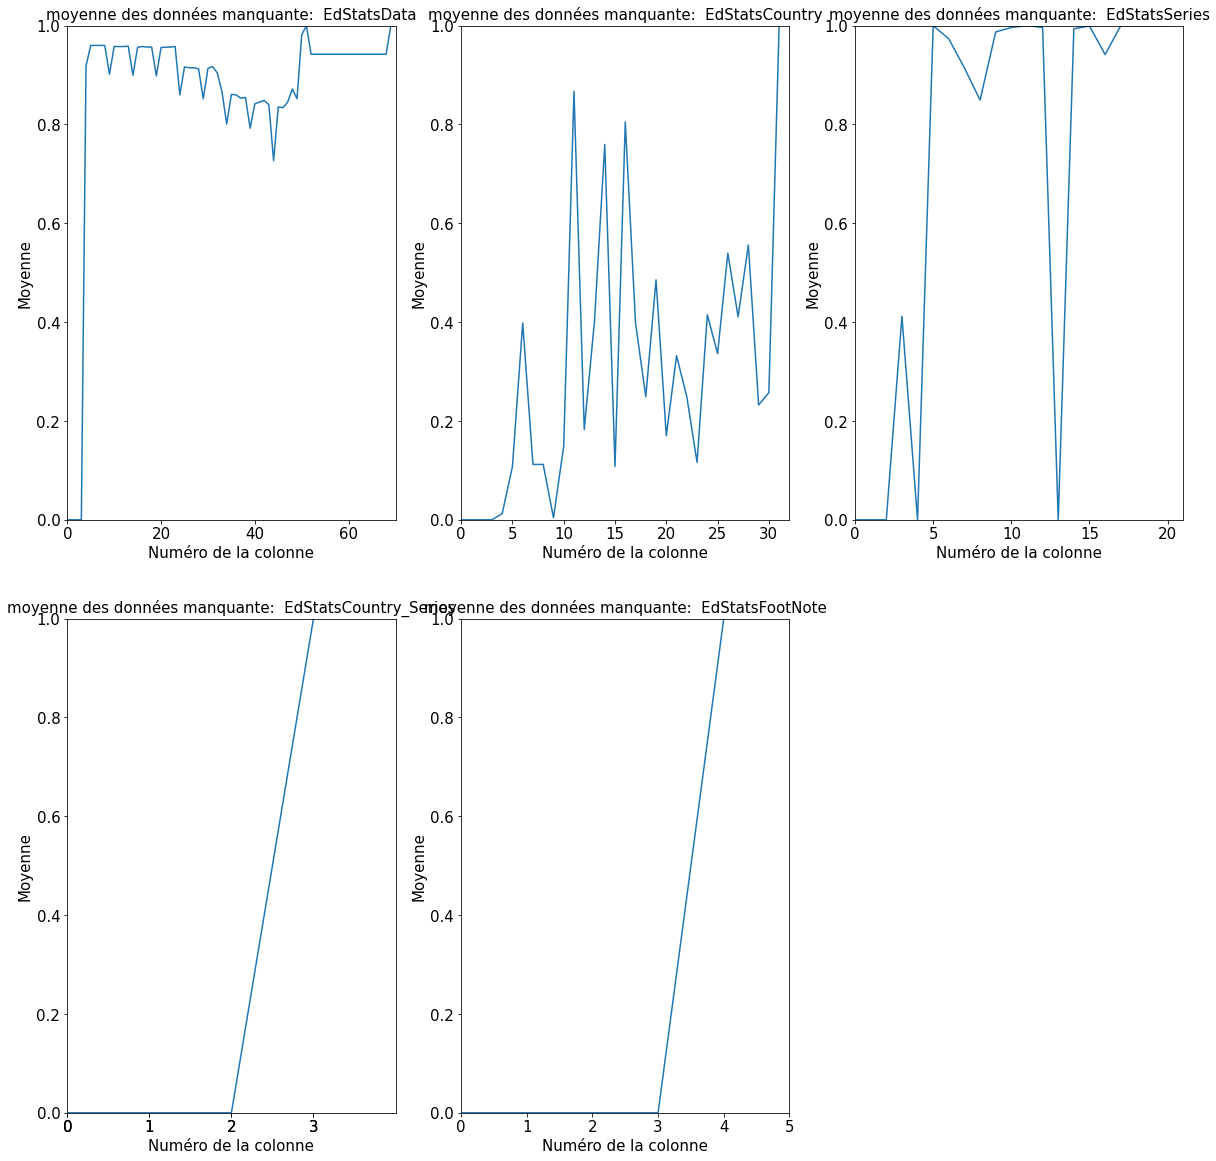

In [450]:
#Plots
plt.figure(figsize=(20,20))    
plotting(EdStatsData,'EdStatsData',1)  
plotting(EdStatsCountry,'EdStatsCountry',2)
plotting(EdStatsSeries,'EdStatsSeries',3)
plotting(EdStatsCountry_Series,'EdStatsCountry_Series',4)
plotting(EdStatsFootNote,'EdStatsFootNote',5)
plt.show()

In [451]:
# Getting the Income groups
income=EdStatsCountry['Income Group'].unique()
income

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [452]:
subset_EdStatsCountry=EdStatsCountry[['Country Code','Income Group']]
df=pd.merge(EdStatsData,subset_EdStatsCountry,on='Country Code',how='left')


Les colonnes qui indiquent des pays contiennent aussi des régions, on va créer une liste des régions afin de les retirer de notre dataset, car on va nous focaliser sur les pays 

In [453]:
# list of values to remove from 'Country Name'
list_retirer=['Arab World','Sub-Saharan Africa (excluding high income)','Sub-Saharan Africa','Middle East & North Africa (excluding high income)','Middle East & North Africa','Latin America & Caribbean (excluding high income)','Latin America & Caribbean','High income','Europe & Central Asia (excluding high income)','East Asia & Pacific (excluding high income)','East Asia & Pacific','East Asia & Pacific (developing only)','East Asia & Pacific (all income levels)','Europe & Central Asia (developing only)','Europe & Central Asia (all income levels)','Europe & Central Asia','Euro area','European Union','Heavily indebted poor countries (HIPC)','Latin America & Caribbean (developing only)','Latin America & Caribbean (all income levels)','Least developed countries: UN classification','Low income','Lower middle income','Low & middle income','Middle East & North Africa (all income levels)','Middle income','Middle East & North Africa (developing only)','North America','OECD members','South Asia','Sub-Saharan Africa (developing only)','Sub-Saharan Africa (all income levels)','Upper middle income','World']


In [454]:
df=df[~df['Country Name'].isin(list_retirer)]


In [455]:
l=df.groupby('Indicator Name')['2010','2011','2012','2013','2014','2015','2016','2017','2020'].count()
m=l.sum(axis=1).sort_values()


<ipython-input-455-716f8b3ed255>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  l=df.groupby('Indicator Name')['2010','2011','2012','2013','2014','2015','2016','2017','2020'].count()


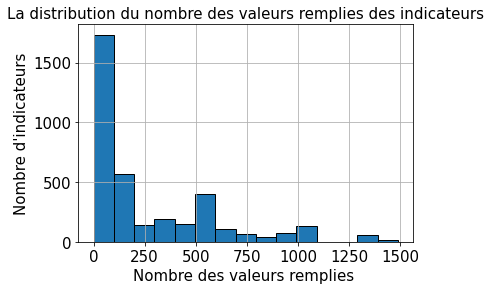

In [456]:
plt.figure()
plt.hist(m.values,bins=15,edgecolor='black')
plt.grid()
plt.xlabel("Nombre des valeurs remplies ")
plt.ylabel("Nombre d'indicateurs")
plt.title('La distribution du nombre des valeurs remplies des indicateurs')
plt.show()

In [457]:
indicateur_retirer=[]
for elt in m.index:
    if m.loc[elt]<50:
        indicateur_retirer.append(elt)

In [458]:
df=df[~df['Indicator Name'].isin(indicateur_retirer)]

In [459]:
list_Of_Indicator=['Population, total',
                'Internet users (per 100 people)',
                'Government expenditure in educational institutions as % of GDP (%)',
                'Government expenditure on secondary education as % of GDP (%)',
                'Government expenditure on tertiary education as % of GDP (%)',
                'Expenditure on secondary as % of total government expenditure (%)',
                'Expenditure on tertiary as % of total government expenditure (%)',
                'Government expenditure per secondary student (PPP$)',
                'Government expenditure per tertiary student (PPP$)',
                'Government expenditure per secondary student (constant PPP$)',
                'Government expenditure per tertiary student (constant PPP$)',
                'Government expenditure per secondary student (US$)',
                'Government expenditure per tertiary student (US$)',
                'Government expenditure per secondary student (constant US$)',
                'Government expenditure per tertiary student (constant US$)',
                'Government expenditure in secondary institutions education as % of GDP (%)',
                'Government expenditure in tertiary institutions as % of GDP (%)',
                'Adult literacy rate, population 15+ years, both sexes (%)',
                'Youth literacy rate, population 15-24 years, both sexes (%)',
                'GDP per capita (current US$)',
                'GNI (current US$)',
                'Unemployment, total (% of total labor force)',
                'Gross enrolment ratio, primary to tertiary, both sexes (%)',
                'Barro-Lee: Percentage of population age 15+ with no education'               
                   ]

In [460]:
df=df[df['Indicator Name'].isin(list_Of_Indicator)]

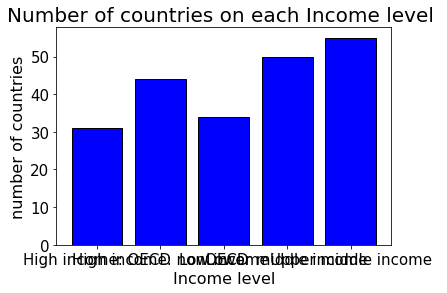

In [461]:
income_indicator=df[['Income Group','Country Name']].drop_duplicates()
income_indicator=income_indicator.groupby('Income Group').count()
income_indicator
#plt.bar(income_indicator.index,income_indicator.values)
#plt.plot(income_indicator)
#plt.show()
# create a color palette the length of the dataframe
x=list(income_indicator.index)
#pos = np.arange(len(city))

y=income_indicator.values


plt.bar(x,y.reshape(-1),color='blue',edgecolor='black')

plt.xticks(x)

plt.xlabel('Income level', fontsize=16)

plt.ylabel('number of countries', fontsize=16)

plt.title('Number of countries on each Income level ',fontsize=20)

plt.show()


In [462]:
#filer by income level
df=df.loc[df['Income Group'].isin(['Upper middle income','High income: nonOECD','High income: OECD'])]
df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Income Group
95310,Albania,ALB,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income
95664,Albania,ALB,Barro-Lee: Percentage of population age 15+ wi...,BAR.NOED.15UP.ZS,37.92,NaN,NaN,NaN,NaN,30.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income
96527,Albania,ALB,Expenditure on secondary as % of total governm...,UIS.XGOVEXP.IMF.23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income
96529,Albania,ALB,Expenditure on tertiary as % of total governme...,UIS.XGOVEXP.IMF.56,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income
96535,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869932,Virgin Islands (U.S.),VIR,"Gross enrolment ratio, primary to tertiary, bo...",SE.TOT.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income: nonOECD
869980,Virgin Islands (U.S.),VIR,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income: nonOECD
871138,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,63000.00,71000.0,76000.0,84000.0,90000.0,94000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income: nonOECD
871953,Virgin Islands (U.S.),VIR,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income: nonOECD


In [463]:
#filter and keep only indicators on our list of interest and add a column that computes the mean on row level on the time window for each element(country, indicator)
df=df[df['Indicator Name'].isin(list_Of_Indicator)]
df['Moyenne']=df[['2010','2011','2012','2013','2014','2015','2016','2017','2020']].mean(axis=1)

In [464]:
df_mean_Indicator= df[['Country Name','Indicator Name','Moyenne']]

In [465]:
#Analysis about number of Population
df_population=df_mean_Indicator[df['Indicator Name']=='Population, total']
df_population['Moyenne'].describe()

count    1.300000e+02
mean     2.850406e+07
std      1.242375e+08
min      1.081557e+04
25%      2.930205e+05
50%      3.779293e+06
75%      1.459774e+07
max      1.357724e+09
Name: Moyenne, dtype: float64

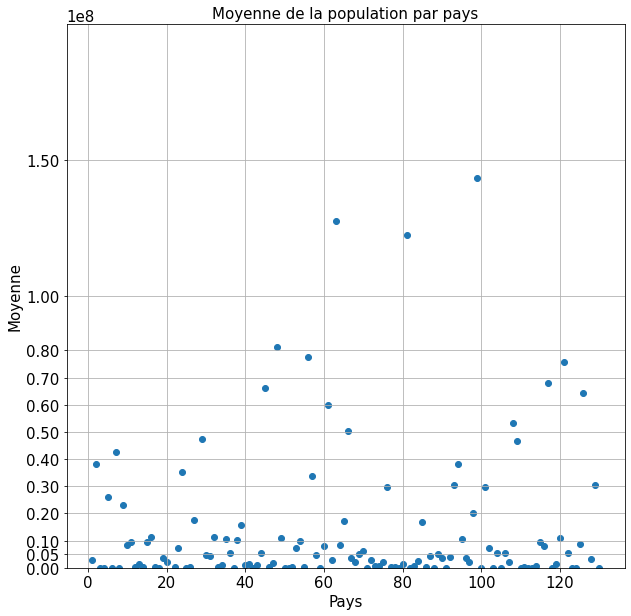

In [514]:
plt.figure(figsize=(10,10))
plt.scatter(x=np.arange(1,131),y=df_population['Moyenne'])
plt.ylim([0,2e8])
plt.yticks([0,0.05e8,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8,0.8e8,1e8,1.5e8])
plt.xlabel('Pays')
plt.ylabel('Moyenne')
plt.title('Moyenne de la population par pays')
plt.grid()
plt.show()

In [467]:
#Analysis about number of users of internet
df_IT=df_mean_Indicator[df['Indicator Name']=='Internet users (per 100 people)']
df_IT['Moyenne'].describe()

count    121.000000
mean      60.177503
std       21.368884
min        8.128571
25%       45.312193
50%       62.087373
75%       77.412824
max       96.509472
Name: Moyenne, dtype: float64

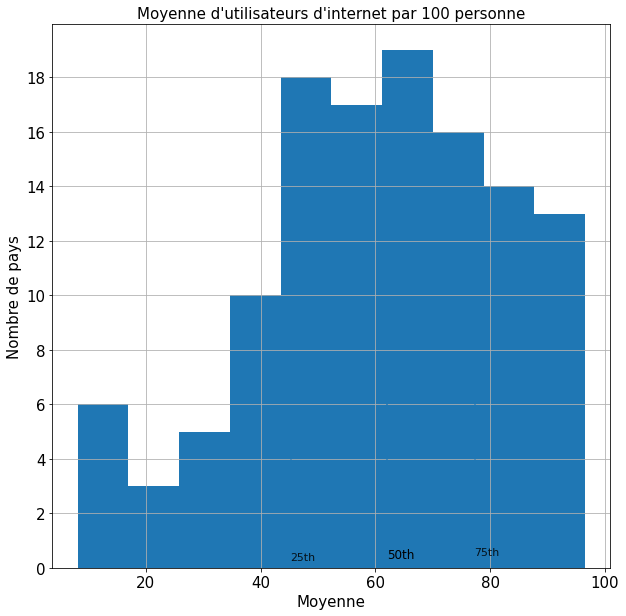

In [528]:

fig, ax = plt.subplots(figsize = (10,10))
quant_25, quant_50, quant_75 =  df_IT['Moyenne'].quantile(0.25), df_IT['Moyenne'].quantile(0.5), df_IT['Moyenne'].quantile(0.75)
quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46]]
ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
#plt.figure(figsize=(10,10))
#plt.scatter(x=np.arange(1,131),y=df_IT['Moyenne'])
plt.hist(df_IT['Moyenne'])
plt.yticks([0,2,4,6,8,10,12,14,16,18])
plt.xlabel('Moyenne')
plt.ylabel('Nombre de pays')
plt.title('Moyenne d\'utilisateurs d\'internet par 100 personne')
plt.grid()
plt.show()

In [469]:
#Analysis about the level of expenditure of governements on education
expenditure_Indicator=['Government expenditure in educational institutions as % of GDP (%)',
                'Government expenditure on secondary education as % of GDP (%)',
                'Government expenditure on tertiary education as % of GDP (%)',
                'Expenditure on secondary as % of total government expenditure (%)',
                'Expenditure on tertiary as % of total government expenditure (%)',
                'Government expenditure per secondary student (PPP$)',
                'Government expenditure per tertiary student (PPP$)',
                'Government expenditure per secondary student (constant PPP$)',
                'Government expenditure per tertiary student (constant PPP$)',
                'Government expenditure per secondary student (US$)',
                'Government expenditure per tertiary student (US$)',
                'Government expenditure per secondary student (constant US$)',
                'Government expenditure per tertiary student (constant US$)',
                'Government expenditure in secondary institutions education as % of GDP (%)',
                'Government expenditure in tertiary institutions as % of GDP (%)',
                'GDP per capita (current US$)',
                'GNI (current US$)','Unemployment, total (% of total labor force)']
                      
df_expenditure=df_mean_Indicator[df['Indicator Name'].isin(expenditure_Indicator)]

In [470]:
df_expenditure.groupby('Indicator Name').agg({'Moyenne': lambda x: x.isnull().mean()})

,Moyenne
Indicator Name,
Expenditure on secondary as % of total government expenditure (%),0.415385
Expenditure on tertiary as % of total government expenditure (%),0.423077
GDP per capita (current US$),0.061538
GNI (current US$),0.130769
Government expenditure in educational institutions as % of GDP (%),0.376923
Government expenditure in secondary institutions education as % of GDP (%),0.353846
Government expenditure in tertiary institutions as % of GDP (%),0.415385
Government expenditure on secondary education as % of GDP (%),0.361538
Government expenditure on tertiary education as % of GDP (%),0.392308


In [471]:
# We will create an aggregated Indicator for this analysis based on most relevant indicators
df_Investement_Education=df_expenditure[df_expenditure['Indicator Name'].isin(['Government expenditure on secondary education as % of GDP (%)','Government expenditure on tertiary education as % of GDP (%)'])]
s=df_Investement_Education.groupby('Country Name').agg('sum').reset_index()
s['Moyenne']=s['Moyenne']/2
s.rename(columns={'Moyenne':'mean_Gov_exp'})
s=s.merge(df_expenditure[df_expenditure['Indicator Name']=='GDP per capita (current US$)'],on='Country Name')
s['valeur']=s['Moyenne_x']*s['Moyenne_y']
s=s[s['valeur']!=0]
s.dropna()
s['valeur'].describe()

count        88.000000
mean      38376.081553
std       39745.264062
min         901.517996
25%        8569.427145
50%       19579.117277
75%       57829.209936
max      195055.479976
Name: valeur, dtype: float64

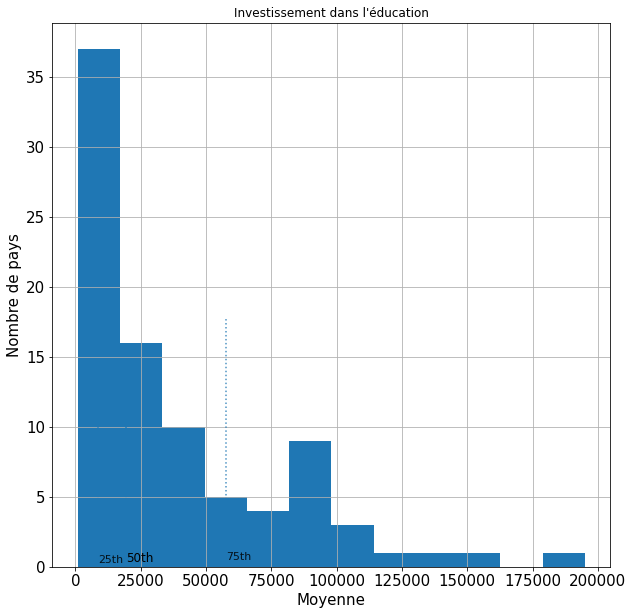

In [526]:
fig, ax = plt.subplots(figsize = (10,10))
#plt.figure(figsize=(10,10))
#plt.scatter(x=np.arange(1,len(s)+1),y=s['valeur'])

plt.hist(s['valeur'],bins=12)
quant_25, quant_50, quant_75 =  s['valeur'].quantile(0.25), s['valeur'].quantile(0.5), s['valeur'].quantile(0.75)
quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46]]
ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Plot the lines with a loop


plt.xlabel('Moyenne')
plt.ylabel('Nombre de pays')
plt.title('Investissement dans l\'éducation',fontsize=12)
plt.grid()
plt.show()

In [473]:
# We will analyse about the GDP
df_GDP=df_expenditure[df_expenditure['Indicator Name']=='GDP per capita (current US$)']
df_GDP=df_GDP.dropna()
df_GDP.describe()

,Moyenne
count,122.000000
mean,26359.489079
std,27939.464889
min,3350.058544
25%,7052.362497
50%,14520.449489
75%,39516.623145
max,161621.007752


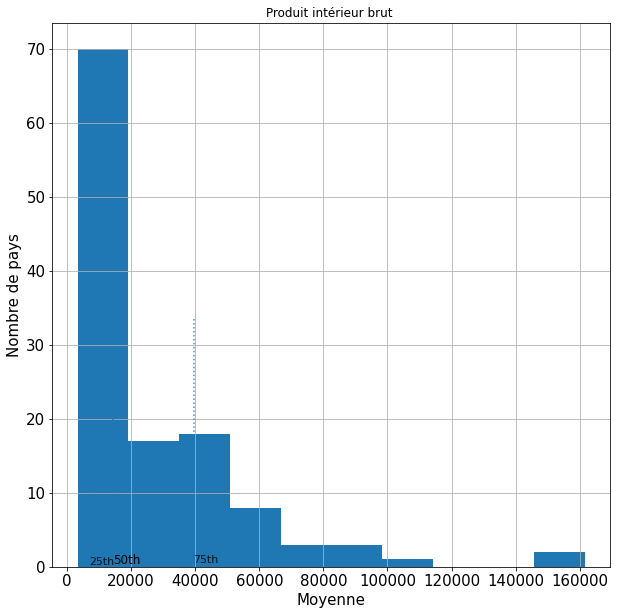

In [525]:
fig, ax = plt.subplots(figsize = (10,10))
plt.hist(df_GDP['Moyenne'])
quant_25, quant_50, quant_75 =  df_GDP['Moyenne'].quantile(0.25), df_GDP['Moyenne'].quantile(0.5), df_GDP['Moyenne'].quantile(0.75)
quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46]]
ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
#plt.figure(figsize=(10,10))
#plt.scatter(x=np.arange(1,len(df_GDP)+1),y=df_GDP['Moyenne'])
plt.xlabel('Moyenne')
plt.ylabel('Nombre de pays')
plt.title('Produit intérieur brut ',fontsize=12)
plt.grid()
plt.show()


In [475]:
#We will analyse regarding GNI
df_GNI=df_expenditure[df_expenditure['Indicator Name']=='GNI (current US$)']
df_GNI=df_GNI.dropna()
df_GNI.describe()

,Moyenne
count,1.130000e+02
mean,6.024585e+11
std,1.944443e+12
min,5.384779e+07
25%,1.371879e+10
50%,6.132080e+10
75%,3.507200e+11
max,1.714797e+13


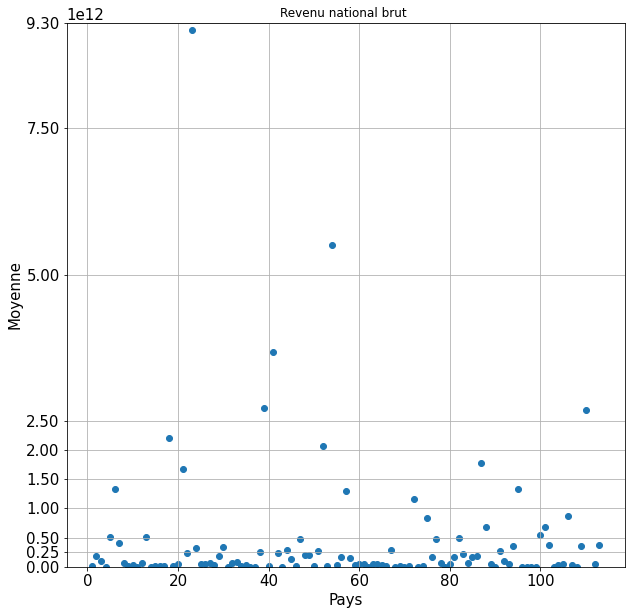

In [518]:
plt.figure(figsize=(10,10))
plt.scatter(x=np.arange(1,len(df_GNI)+1),y=df_GNI['Moyenne'])
plt.ylim([0,0.93e13])
plt.yticks([0,0.025e13,0.05e13,0.1e13,0.15e13,0.2e13,0.25e13,0.5e13,0.75e13,0.93e13])
plt.xlabel('Pays')
plt.ylabel('Moyenne')
plt.title('Revenu national brut ',fontsize=12)
plt.grid()
plt.show()


In [477]:
#We will analyse regarding the unemployement
df_unemployement=df_expenditure[df_expenditure['Indicator Name']=='Unemployment, total (% of total labor force)'].dropna()
df_unemployement['mean']=df_unemployement['Moyenne'].mean()
df_unemployement['Moyenne'].describe()B

count    106.000000
mean       9.551078
std        6.019119
min        0.328571
25%        5.328571
50%        7.835714
75%       12.939286
max       28.742857
Name: Moyenne, dtype: float64

In [496]:
df_unemployement=df_unemployement[df_unemployement['Moyenne']<5.32]

,Country Name,Indicator Name,Moyenne,mean
113298,Angola,"Unemployment, total (% of total labor force)",6.185714,9.551078
120628,Argentina,"Unemployment, total (% of total labor force)",7.500000,9.551078
131623,Australia,"Unemployment, total (% of total labor force)",5.585714,9.551078
135288,Austria,"Unemployment, total (% of total labor force)",5.271429,9.551078
138953,Azerbaijan,"Unemployment, total (% of total labor force)",5.157143,9.551078
146283,Bahrain,"Unemployment, total (% of total labor force)",1.171429,9.551078
157278,Belarus,"Unemployment, total (% of total labor force)",0.571429,9.551078
197593,Brunei Darussalam,"Unemployment, total (% of total labor force)",5.871429,9.551078
223248,Canada,"Unemployment, total (% of total labor force)",7.257143,9.551078
237908,Channel Islands,"Unemployment, total (% of total labor force)",7.214286,9.551078


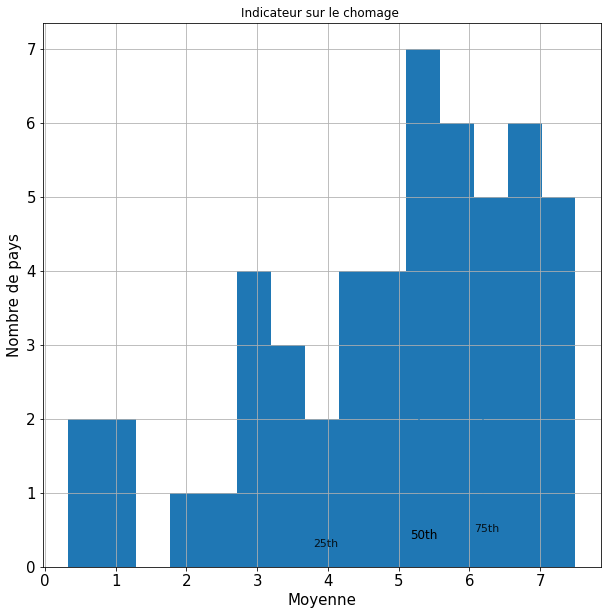

In [524]:
fig, ax = plt.subplots(figsize = (10,10))
plt.hist(df_unemployement['Moyenne'],bins=15)
quant_25, quant_50, quant_75 =  df_unemployement['Moyenne'].quantile(0.25), df_unemployement['Moyenne'].quantile(0.5), df_unemployement['Moyenne'].quantile(0.75)
quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46]]
ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
#plt.figure(figsize=(10,10))
#plt.scatter(x=np.arange(1,len(df_unemployement)+1),y=df_unemployement['Moyenne'])
plt.xlabel('Moyenne')
plt.ylabel('Nombre de pays')
plt.title('Indicateur sur le chomage ',fontsize=12)
plt.grid()
plt.show()


In [479]:
literacy_Indicator=['Adult literacy rate, population 15+ years, both sexes (%)',
                'Youth literacy rate, population 15-24 years, both sexes (%)','Gross enrolment ratio, primary to tertiary, both sexes (%)' ]
df_literacy=df_mean_Indicator[df['Indicator Name'].isin(literacy_Indicator)]



In [480]:
means_stds=df_literacy.groupby('Indicator Name').agg(['mean','std']).reset_index()
df_literacy = df_literacy.merge(means_stds,on='Indicator Name')
df_literacy=df_literacy.dropna()

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [481]:
df_literacy[df_literacy['Indicator Name']=='Adult literacy rate, population 15+ years, both sexes (%)']['Moyenne'].describe()


count     63.000000
mean      94.244887
std        8.531599
min       43.683280
25%       93.809123
50%       96.167510
75%       98.422085
max      100.000000
Name: Moyenne, dtype: float64

In [482]:
df_literacy[df_literacy['Indicator Name']=='Youth literacy rate, population 15-24 years, both sexes (%)']['Moyenne'].describe()


count     63.000000
mean      97.688578
std        6.597290
min       52.318890
25%       98.429662
50%       99.005583
75%       99.602330
max      100.000000
Name: Moyenne, dtype: float64

In [483]:
df_literacy[df_literacy['Indicator Name']=='Gross enrolment ratio, primary to tertiary, both sexes (%)']['Moyenne'].describe()

count     88.000000
mean      88.315249
std       11.295564
min       58.272554
25%       81.837109
50%       88.834543
75%       96.367404
max      114.361972
Name: Moyenne, dtype: float64

In [484]:
df_literacy['Normalized']=(df_literacy['Moyenne']-df_literacy[('Moyenne', 'mean')])/df_literacy[('Moyenne', 'std')]
df_literacy

,Country Name,Indicator Name,Moyenne,"(Moyenne, mean)","(Moyenne, std)",Normalized
0,Albania,"Adult literacy rate, population 15+ years, bot...",97.046135,94.244887,8.531599,0.328338
3,Andorra,"Adult literacy rate, population 15+ years, bot...",100.000000,94.244887,8.531599,0.674564
4,Angola,"Adult literacy rate, population 15+ years, bot...",66.030110,94.244887,8.531599,-3.307091
6,Argentina,"Adult literacy rate, population 15+ years, bot...",98.090000,94.244887,8.531599,0.450691
7,Aruba,"Adult literacy rate, population 15+ years, bot...",96.822640,94.244887,8.531599,0.302142
...,...,...,...,...,...,...
377,Tonga,"Youth literacy rate, population 15-24 years, b...",99.437030,97.688578,6.597290,0.265026
379,Tunisia,"Youth literacy rate, population 15-24 years, b...",96.887565,97.688578,6.597290,-0.121415
380,Turkey,"Youth literacy rate, population 15-24 years, b...",99.005043,97.688578,6.597290,0.199546
387,Uruguay,"Youth literacy rate, population 15-24 years, b...",98.882985,97.688578,6.597290,0.181045


In [485]:
df_literacy=df_literacy[['Country Name','Normalized']].groupby('Country Name').agg('mean').reset_index()

In [486]:
df_literacy['Normalized'].describe()

count    102.000000
mean       0.066284
std        1.035222
min       -6.401706
25%       -0.267613
50%        0.196731
75%        0.512462
max        2.305925
Name: Normalized, dtype: float64

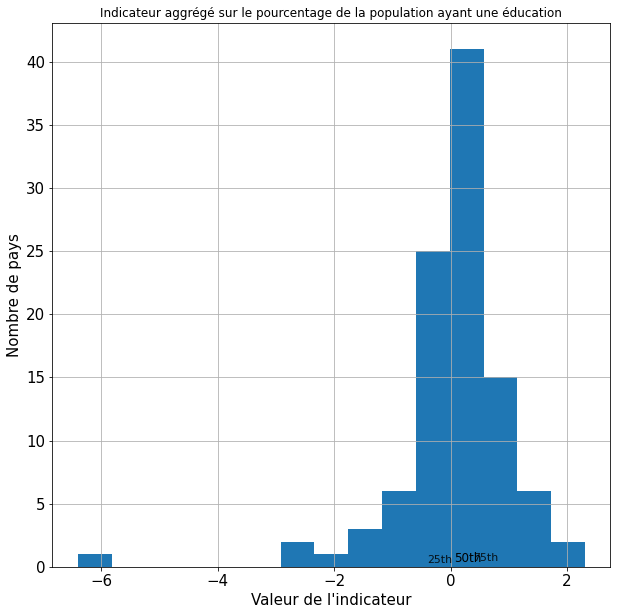

In [522]:
fig, ax = plt.subplots(figsize = (10,10))
plt.hist(df_literacy['Normalized'],bins=15)
quant_25, quant_50, quant_75 =  df_literacy['Normalized'].quantile(0.25), df_literacy['Normalized'].quantile(0.5), df_literacy['Normalized'].quantile(0.75)
quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46]]
ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
#plt.figure(figsize=(10,10))
#plt.scatter(x=np.arange(1,len(df_literacy)+1),y=df_literacy['Normalized'])
#plt.yticks([-8,-6,-4,-2,-1,0,1,2,3])
plt.xlabel('Valeur de l\'indicateur')
plt.ylabel('Nombre de pays')
plt.title('Indicateur aggrégé sur le pourcentage de la population ayant une éducation',fontsize=12)
plt.grid()
plt.show()

In [488]:
#List of countries with top literacy ratio
e=df_literacy[(df_literacy['Normalized']>0.2)]
e=e.sort_values(by='Normalized', axis=0, ascending=False,  ignore_index=True)
e

,Country Name,Normalized
0,Australia,2.305925
1,Finland,1.741055
2,Curacao,1.654913
3,Belgium,1.642194
4,Ireland,1.607808
5,New Zealand,1.552813
6,Netherlands,1.477000
7,Denmark,1.341399
8,Grenada,1.015839
9,Iceland,0.979783


In [489]:
#Top countries investing in education
list_top_Investing_Education=s[s['valeur']>19580]
list_top_Investing_Education=top_Investing_Education.sort_values(by='valeur', axis=0, ascending=False,  ignore_index=True)


In [490]:
list_top_Investing_Education

,Country Name,Moyenne_x,Indicator Name,Moyenne_y,valeur
0,Norway,2.147370,GDP per capita (current US$),90834.593814,195055.479976
1,Denmark,2.614722,GDP per capita (current US$),58372.206629,152627.121482
2,Switzerland,1.647952,GDP per capita (current US$),82883.450322,136587.919755
3,Sweden,2.089648,GDP per capita (current US$),55861.218084,116730.254811
4,Finland,2.124617,GDP per capita (current US$),47111.974826,100094.887662
5,Austria,2.046134,GDP per capita (current US$),48312.213765,98853.250722
6,"Macao SAR, China",1.307805,GDP per capita (current US$),75424.883631,98641.040630
7,Netherlands,1.918598,GDP per capita (current US$),49643.087275,95245.104102
8,Liechtenstein,0.585070,GDP per capita (current US$),161621.007752,94559.605268
9,Belgium,2.077742,GDP per capita (current US$),44628.152924,92725.772659


In [491]:
# Top countries of population combined by usage of internet
list_c=df[((df['Moyenne']>2.930205e+05)&(df['Indicator Name']=='Population, total'))|((df['Indicator Name']=='Internet users (per 100 people)')&(df['Moyenne']>40))]['Country Name']
list_c=list_c.reset_index().groupby('Country Name').agg('count').reset_index()


In [492]:
list_top_Investing_Education=list_top_Investing_Education.merge(list_c,how='inner',on='Country Name')
list_top_Investing_Education=list_top_Investing_Education.merge(e,how='inner',on='Country Name')

In [493]:
# Top rich countries
C=df_expenditure[(df_expenditure['Moyenne']>14520) & (df_expenditure['Indicator Name']=='GDP per capita (current US$)')]
d=df_expenditure[(df_expenditure['Moyenne']>6e10) & (df_expenditure['Indicator Name']=='GNI (current US$)')]
C=C.sort_values(by='Moyenne',ascending=False,  ignore_index=True)
down_countries=list(C.tail(12)['Country Name'])
C=C[~C['Country Name'].isin(down_countries)]
d=d.sort_values(by='Moyenne',ascending=False,  ignore_index=True)
down_countries=list(d.tail(8)['Country Name'])
d=d[~d['Country Name'].isin(down_countries)]
d


,Country Name,Indicator Name,Moyenne
0,United States,GNI (current US$),1.714797e+13
1,China,GNI (current US$),9.188513e+12
2,Japan,GNI (current US$),5.506690e+12
3,Germany,GNI (current US$),3.677610e+12
4,France,GNI (current US$),2.723128e+12
5,United Kingdom,GNI (current US$),2.688033e+12
6,Brazil,GNI (current US$),2.211229e+12
7,Italy,GNI (current US$),2.060746e+12
8,Russian Federation,GNI (current US$),1.771824e+12
9,Canada,GNI (current US$),1.677669e+12


In [494]:
d=d.merge(C,how='inner',on='Country Name')
d=d.merge(list_top_Investing_Education,how='inner',on='Country Name')
list_des_pays=d['Country Name']
list_des_pays

0      United States
1            Germany
2             France
3     United Kingdom
4              Italy
5          Australia
6              Spain
7        Korea, Rep.
8        Netherlands
9             Sweden
10           Belgium
11            Norway
12           Austria
13           Denmark
14         Singapore
15            Israel
16           Finland
17           Ireland
18       New Zealand
Name: Country Name, dtype: object